In [3]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [ ]:
#problem 1

In [7]:
%%writefile app.py
import streamlit as st

def main():
  st.title("First Streamlit file")
  st.write("Hello")

if __name__ == '__main__':
  main()


Overwriting app.py


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
#Problem 3
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

print(data['target_names'])

['malignant' 'benign']


In [11]:
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)

principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

print(x.shape)

(569, 3)


In [14]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611305,
         0.1518916 ,  0.06016535, -0.03476751,  0.19034876,  0.36657545,
        -0.10555215,  0.08997968, -0.08945724, -0.15229262,  0.20443043,
         0.23271591,  0.1972073 ,  0.13032155,  0.183848  ,  0.28009205,
        -0.21986637, -0.04546729, -0.19987842, -0.21935185,  0.17230437,
         0.14359317,  0.09796411, -0.00825725,  0.14188336,  0.27533946],
       [-0.00853104,  0.06454971, -0.00931409,  0.02869966, -0.10429091,
        -0.07409201,  0.00273335, -0.02556411, -0

Text(0, 0.5, 'pc2')

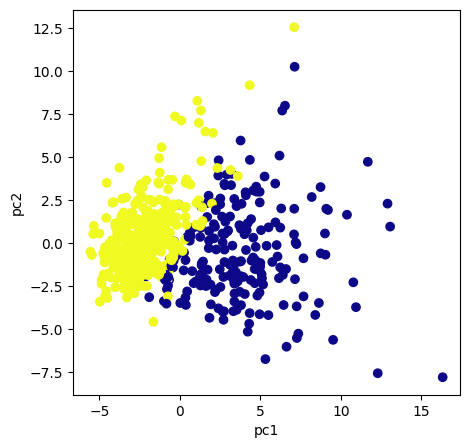

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

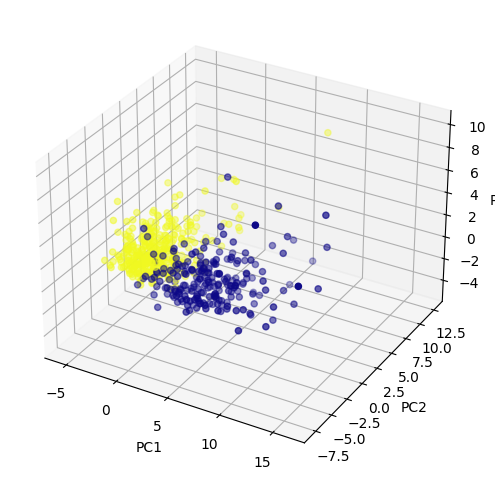

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [18]:
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Problem 4
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
pipe.fit(X_train, y_train)

pipe.get_params()

print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
0.9666666666666667
